# 1. Imports 

In [6]:
%%capture
!pip install ultralytics 

In [7]:
!pip install -U ray

  Obtaining dependency information for ray from https://files.pythonhosted.org/packages/47/64/df42e5aa163ef91fdcdaf39aa4672ac1d87facfa7063bdb45c557eded76c/ray-2.20.0-cp310-cp310-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 MB 19.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.6.3
    Uninstalling ray-2.6.3:
      Successfully uninstalled ray-2.6.3


In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import yaml
import math
import wandb
from ultralytics import YOLO

# 2. Visualize some samples

In [9]:
# Define the paths to your train and val directories
train_dir = '/kaggle/input/face-detection-dataset/images/train'
val_dir = '/kaggle/input/face-detection-dataset/images/val'

# Function to count images in a directory
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file is an image file (adjust extensions as needed)
            if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
                count += 1
    return count

# Count images in the train and val directories
train_images_count = count_images(train_dir)
val_images_count = count_images(val_dir)

# Print the counts
print(f"Number of images in train directory: {train_images_count}")
print(f"Number of images in val directory: {val_images_count}")

Number of images in train directory: 13386
Number of images in val directory: 3347


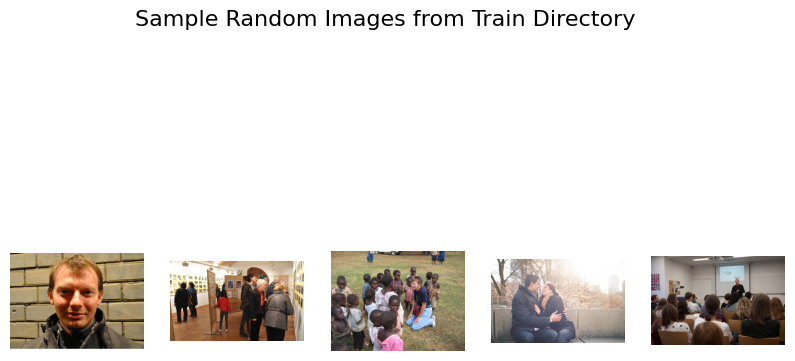

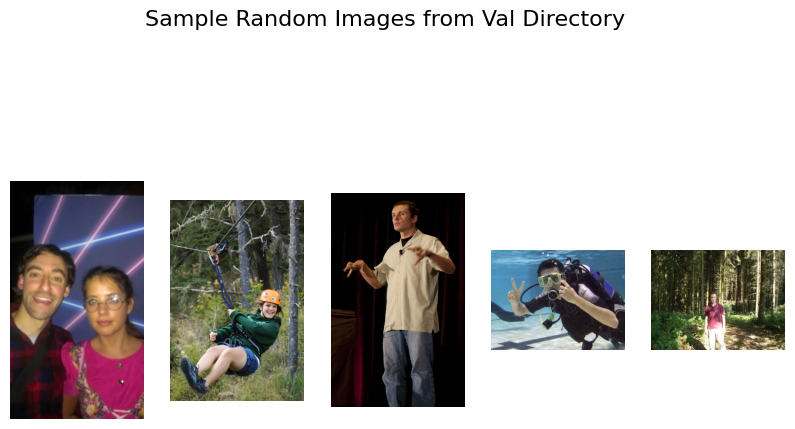

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to your train and val directories
train_dir = '/kaggle/input/face-detection-dataset/images/train'
val_dir = '/kaggle/input/face-detection-dataset/images/val'

# Function to visualize random images from a directory
def visualize_random_images(directory, num_images=5):
    images_to_show = num_images
    fig = plt.figure(figsize=(10, 6))

    # List all image files in the directory
    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
                img_path = os.path.join(root, file)
                all_files.append(img_path)

    # Shuffle the list of image paths
    random.shuffle(all_files)
    
    # Display random images
    for i in range(images_to_show):
        img_path = all_files[i]
        img = mpimg.imread(img_path)
        plt.subplot(1, images_to_show, i + 1)
        plt.imshow(img)
        plt.axis('off')

# Visualize random images in the train directory
visualize_random_images(train_dir)
plt.suptitle('Sample Random Images from Train Directory', fontsize=16)
plt.show()

# Visualize random images in the val directory
visualize_random_images(val_dir)
plt.suptitle('Sample Random Images from Val Directory', fontsize=16)
plt.show()

# 3. Set Config file and train model

In [11]:
config_file = {
    'data':'/kaggle/input/face-detection-dataset',
    'train':'/kaggle/input/face-detection-dataset/images/train',
    'train_labels':'/kaggle/input/face-detection-dataset/labels/train',
    'val':'/kaggle/input/face-detection-dataset/images/val',
    'val_labels':'/kaggle/input/face-detection-dataset/labels/val',
    'names':['face']
}

In [12]:
with open('config_file.yaml', 'w') as file:
    yaml.dump(config_file, file, default_flow_style=False)

In [13]:
with open('/kaggle/working/config_file.yaml', 'r') as file:
    loaded_config = yaml.safe_load(file)

In [14]:
# Log in to Weights and Biases with your API key
wandb.login(key='743abff184a2764efeab329bcbae4f6889ec1cd2')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [15]:
model = YOLO('yolov8n.pt')
model.train(data='/kaggle/working/config_file.yaml', epochs=20)

100%|██████████| 6.23M/6.23M [00:00<00:00, 165MB/s]


Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/config_file.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 35.9MB/s]
2024-05-08 09:47:24,894	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-08 09:47:25,594	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Currently logged in as: hossamrizk048. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/face-detection-dataset/labels/train... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [01:02<00:00, 214.76it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/face-detection-dataset/labels/val... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:15<00:00, 221.81it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/face-detection-dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.21G      1.392      1.278      1.189         57        640: 100%|██████████| 837/837 [03:20<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:28<00:00,  3.72it/s]


                   all       3347      10299      0.853      0.689      0.775      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.78G      1.346     0.9282      1.162         46        640: 100%|██████████| 837/837 [03:12<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:26<00:00,  3.97it/s]


                   all       3347      10299      0.877      0.698      0.789      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.12G      1.316     0.8841      1.151         67        640: 100%|██████████| 837/837 [03:11<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:26<00:00,  4.02it/s]


                   all       3347      10299      0.881      0.711        0.8      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.21G      1.295     0.8477      1.138         33        640: 100%|██████████| 837/837 [03:11<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:26<00:00,  3.92it/s]


                   all       3347      10299      0.874      0.735      0.814      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.07G       1.27     0.8039      1.125         42        640: 100%|██████████| 837/837 [03:11<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.88it/s]


                   all       3347      10299      0.885      0.738      0.821      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.77G      1.246      0.775      1.116         60        640: 100%|██████████| 837/837 [03:12<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:26<00:00,  3.94it/s]


                   all       3347      10299      0.887      0.755      0.839      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.84G      1.222     0.7424      1.103         49        640: 100%|██████████| 837/837 [03:15<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.78it/s]


                   all       3347      10299      0.881      0.766      0.845      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.59G      1.217     0.7304      1.099         33        640: 100%|██████████| 837/837 [03:17<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.84it/s]


                   all       3347      10299      0.883      0.774      0.847      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.16G      1.204     0.7148      1.094         57        640: 100%|██████████| 837/837 [03:15<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.80it/s]


                   all       3347      10299      0.888      0.778      0.854      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.11G      1.195     0.6924       1.09         67        640: 100%|██████████| 837/837 [03:15<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.83it/s]


                   all       3347      10299       0.89      0.779      0.856      0.559
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.07G      1.192      0.659      1.089         20        640: 100%|██████████| 837/837 [03:07<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.78it/s]


                   all       3347      10299      0.888      0.778      0.856      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.15G      1.179     0.6439      1.082         24        640: 100%|██████████| 837/837 [03:04<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.82it/s]


                   all       3347      10299      0.894      0.774      0.857      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.07G       1.17     0.6347      1.078         17        640: 100%|██████████| 837/837 [03:04<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.81it/s]

                   all       3347      10299       0.89       0.79      0.863      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.12G      1.163     0.6166       1.07         34        640: 100%|██████████| 837/837 [03:05<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.80it/s]


                   all       3347      10299      0.896      0.787      0.867      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.84G       1.15     0.6023      1.067         24        640: 100%|██████████| 837/837 [03:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.88it/s]


                   all       3347      10299      0.895      0.792      0.869      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.12G      1.144      0.591      1.061         20        640: 100%|██████████| 837/837 [03:07<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.78it/s]


                   all       3347      10299      0.894      0.797       0.87      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.88G      1.134      0.577      1.053         21        640: 100%|██████████| 837/837 [03:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:26<00:00,  3.96it/s]


                   all       3347      10299      0.894        0.8      0.873      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.84G      1.123     0.5649      1.046         27        640: 100%|██████████| 837/837 [03:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:26<00:00,  3.94it/s]


                   all       3347      10299      0.894      0.801      0.875      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.08G      1.117     0.5515      1.042         34        640: 100%|██████████| 837/837 [03:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:27<00:00,  3.77it/s]


                   all       3347      10299      0.892      0.808      0.877      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.13G      1.107     0.5403      1.037         34        640: 100%|██████████| 837/837 [03:10<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:28<00:00,  3.75it/s]


                   all       3347      10299      0.895      0.805      0.878      0.586

20 epochs completed in 1.217 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 105/105 [00:30<00:00,  3.49it/s]


                   all       3347      10299      0.895      0.805      0.879      0.586
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▁▂▃▄▄▅▆▆▆▆▆▇▇▇▇▇████
metrics/mAP50-95(B),▁▂▃▃▄▅▅▆▆▆▆▇▇▇▇█████
metrics/precision(B),▁▅▆▄▆▇▆▆▇▇▇█▇█████▇█
metrics/recall(B),▁▂▂▄▄▅▆▆▆▆▆▆▇▇▇▇████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▆▅▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d70c43f0e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
model.save('best1.pt')

# 4. Visualize results

In [17]:
# directory_path = '/kaggle/working/runs/detect/train'  

# # List the contents of the directory
# directory_contents = os.listdir(directory_path)

# # Display the contents of the directory
# print("Contents of the directory:")
# for item in directory_contents:
#     print(item)

In [18]:
# file_path = '/kaggle/working/runs/detect/train/args.yaml'

# with open(file_path, 'r') as file:
#     content = yaml.safe_load(file)

# print(content)

In [19]:
# directory_path = '/kaggle/input/face-detection-dataset/images/val'  

# # Get a list of image files in the directory
# image_files = [file for file in os.listdir(directory_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# # Visualize each image file
# for img_file in image_files:
#     img_path = os.path.join(directory_path, img_file)
#     img = mpimg.imread(img_path)
    
#     plt.figure(figsize=(20, 20))
#     plt.imshow(img)
#     plt.title(img_file)
#     plt.axis('off')
#     plt.show()

In [20]:
# my_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
my_model = YOLO('/kaggle/working/best1.pt')


In [21]:
# def draw_bbox(frame, boxes, colors):
#     for box in boxes:
#         x1, y1, x2, y2 = box.xyxy[0]
#         x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

#         # Extracting the class label and name
#         cls = int(box.cls[0])
#         class_name = "Face"

#         # Retrieving the color for the class
#         color = colors[cls]

#         # Drawing the bounding box on the image
#         cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)

#         # Formatting the confidence level and label text
#         conf = math.ceil((box.conf[0] * 100)) / 100
#         label = f'{class_name} ({conf}%)'

#         # Calculating the size of the label text
#         text_size = cv2.getTextSize(label, 0, fontScale=1, thickness=2)[0]
#         # Calculating the coordinates for the background rectangle of the label
#         rect_coords = x1 + text_size[0], y1 - text_size[1] - 3

#         # Drawing the background rectangle and the label text
#         cv2.rectangle(frame, (x1, y1), rect_coords, color, -1, cv2.LINE_AA)
#         cv2.putText(frame, label, (x1, y1 - 2), 0, 1, (255, 255, 255), thickness=1, lineType=cv2.LINE_AA)
#     return frame

In [22]:
# source = '/kaggle/input/face-detection-dataset/images/train/00006c07d2b033d1.jpg'
# frame = cv2.imread(source)
# result = my_model(frame, conf=0.5)[0]
 
# boxes = result.boxes
# frame = draw_bbox(frame, boxes,  (0,255,255))
# plt.imshow(frame[:,:,::-1])



0: 480x640 3 persons, 93.4ms
Speed: 4.0ms preprocess, 93.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


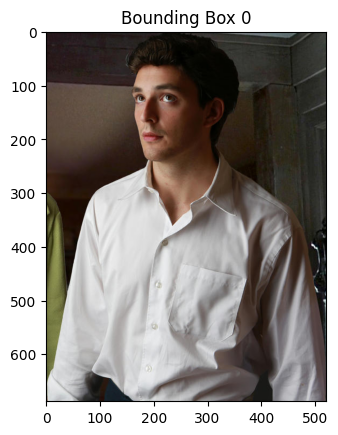

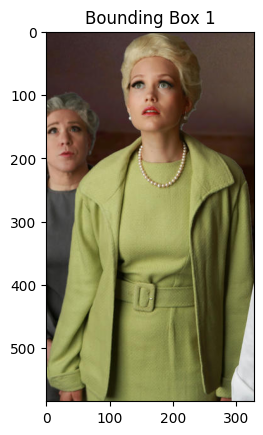

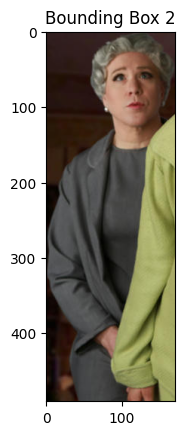

In [23]:
import cv2
import matplotlib.pyplot as plt

# Define the draw_bbox function
def crop_bbox(frame, boxes):
    cropped_images = []
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Crop the bounding box from the original image
        cropped_image = frame[y1:y2, x1:x2]
        cropped_images.append(cropped_image)

    return cropped_images

# Load an image
source = '//kaggle/input/face-detection-dataset/images/train/0000bee39176697a.jpg'
frame = cv2.imread(source)

# Perform inference with the model and get results
result = my_model(frame, conf=0.5)[0]

# Crop bounding boxes from the image
boxes = result.boxes
cropped_images = crop_bbox(frame, boxes)

# Display the cropped images
for i, image in enumerate(cropped_images):
    plt.imshow(image[:,:,::-1])
    plt.title(f"Bounding Box {i}")
    plt.show()



0: 416x640 2 persons, 1 tie, 1 chair, 71.3ms
Speed: 2.1ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


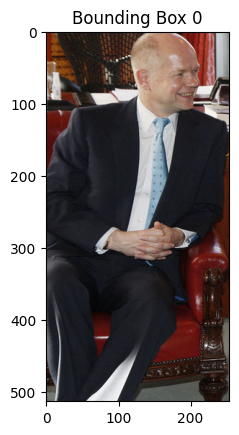

Saved: faces/face_0.jpg


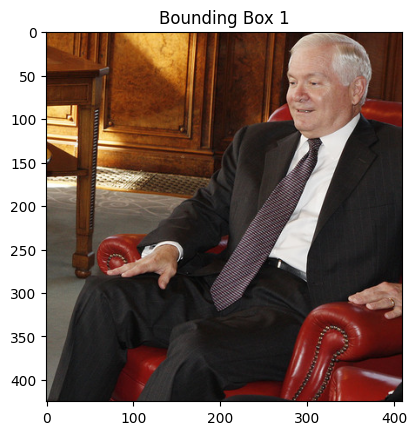

Saved: faces/face_1.jpg


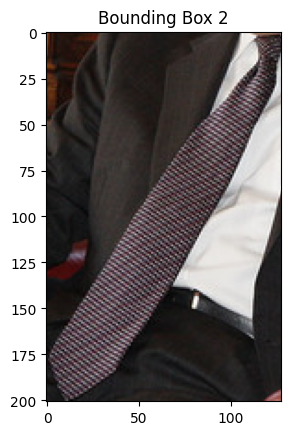

Saved: faces/face_2.jpg


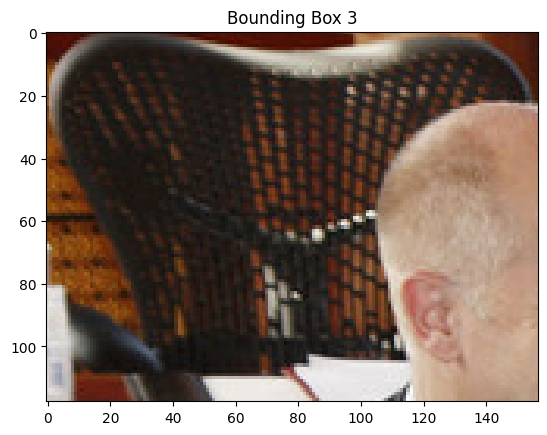

Saved: faces/face_3.jpg


In [31]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the draw_bbox function
def crop_bbox(frame, boxes):
    cropped_images = []
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Crop the bounding box from the original image
        cropped_image = frame[y1:y2, x1:x2]
        cropped_images.append(cropped_image)

    return cropped_images

# Load an image
source = '/kaggle/input/face-detection-dataset/images/val/00b242e2ccf93adc.jpg'
frame = cv2.imread(source)

# Perform inference with the model and get results
result = my_model(frame, conf=0.5)[0]

# Crop bounding boxes from the image
boxes = result.boxes
cropped_images = crop_bbox(frame, boxes)

# Create a folder to save the images
output_folder = "faces"
os.makedirs(output_folder, exist_ok=True)

# Show and save the cropped images
for i, image in enumerate(cropped_images):
    # Display the image using matplotlib
    plt.imshow(image[:, :, ::-1])
    plt.title(f"Bounding Box {i}")
    plt.show()

    # Save the image using OpenCV
    output_path = os.path.join(output_folder, f"face_{i}.jpg")
    cv2.imwrite(output_path, image)

    # Display the saved image path
    print(f"Saved: {output_path}")


In [29]:
import shutil

# Define the folder paths
source_folder = "/kaggle/working/wandb"  # Folder to be zipped
destination_folder = "/kaggle/working"  # Folder to save the zip file

# Create a zip file of the source folder
zip_file_path = shutil.make_archive(destination_folder + "/YoloV8 20Epochs wandb", 'zip', source_folder)

# Move the zip file to the destination folder
shutil.move(zip_file_path, destination_folder)

print(f"Zip file created and saved in '{destination_folder}' folder.")


Error: Destination path '/kaggle/working/YoloV8 20Epochs wandb.zip' already exists